---
# Neural Network
#### Author: Tianyi Mao
---

### **Goal**
The goal of this project is to develop a  machine learning model that  predicts a Pokémon's Type1 based on its available features, such as Type2, evolutionary stage, and other relevant attributes. 

**Step 1**: Data Cleaning and Analysis  
**Step 2**: Train the Model  
**Step 3**: Evaluate the Model  
**Step 4**: Performance Analysis

### **Concepts and Formulas**
The provided script preprocesses a dataset and trains a neural network for a classification task. Below are the key concepts explained using mathematical formulas:

### **One-Hot Encoding**

One-hot encoding transforms categorical data into binary vectors. For a feature with $n$ categories, each category is represented as a vector with $n$ elements, where one element is $1$ (indicating the category) and the rest are $0$.

Mathematically:
$$
x_i = [0, \dots, 1, \dots, 0], \quad \text{where } x_i \in \mathbb{R}^n
$$
Here, $x_i$ is a one-hot vector for category $i$.

### **One-Hot Encoding of Labels**

For multi-class classification, labels are one-hot encoded to match the neural network's output format.

For $y$ with $n$ classes:
$$
y_i = [0, \dots, 1, \dots, 0], \quad \text{where } y_i \in \mathbb{R}^n
$$

### **Neural Network Architecture**

The model includes:
- **Input Layer**: Accepts 19 features (from one-hot encoded `Type2`).
- **Hidden Layers**: Apply the ReLU (Rectified Linear Unit) activation function:
$$
f(x) = \max(0, x)
$$
- **Output Layer**: Applies softmax activation for multi-class classification:
$$
\hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}, \quad i \in [1, n]
$$
where $\hat{y}_i$ is the predicted probability for class $i$, and $z_i$ is the raw output (logit) of the $i$-th neuron.

### **Loss Function: Categorical Cross-Entropy**

The model minimizes the categorical cross-entropy loss, which measures the difference between the true distribution $y$ and predicted distribution $\hat{y}$.
$$
L(y, \hat{y}) = -\sum_{i=1}^n y_i \log(\hat{y}_i)
$$

### **Optimizer: Adam**

The Adam optimizer adjusts the learning rate dynamically using momentum and past gradients:
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla L
$$
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla L)^2
$$
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{v_t} + \epsilon} m_t
$$
Where:
- $m_t$: Moving average of gradients.
- $v_t$: Moving average of squared gradients.
- $\eta$: Learning rate.

### **Performance Metrics**

- **Accuracy**:
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Predictions}}
$$

- **Loss Visualization**:
Plots show training and validation loss/accuracy over epochs to monitor learning progress.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [9]:
# Load dataset
pokemon_data = pd.read_csv("/Users/sherrymao/Documents/Git/INDE577-TianyiMao/Data/Pokemon_data/pokemon.csv")


## Step 1: Data Preperation
In this step, the dataset is preprocessed to handle missing values and prepare it for training. Specifically:
- Rows with missing values in the `Type1` column (the target variable) are removed.
- Missing values in the `Type2` and `Evolution` columns are replaced with "None" to ensure consistency.
- The `Type1` column is encoded into numerical labels using `LabelEncoder`.
- The `Type2` column is one-hot encoded into binary vectors using `OneHotEncoder`.
- A bar chart is plotted to visualize the distribution of Pokémon classes (`Type1`), providing insights into class balance.


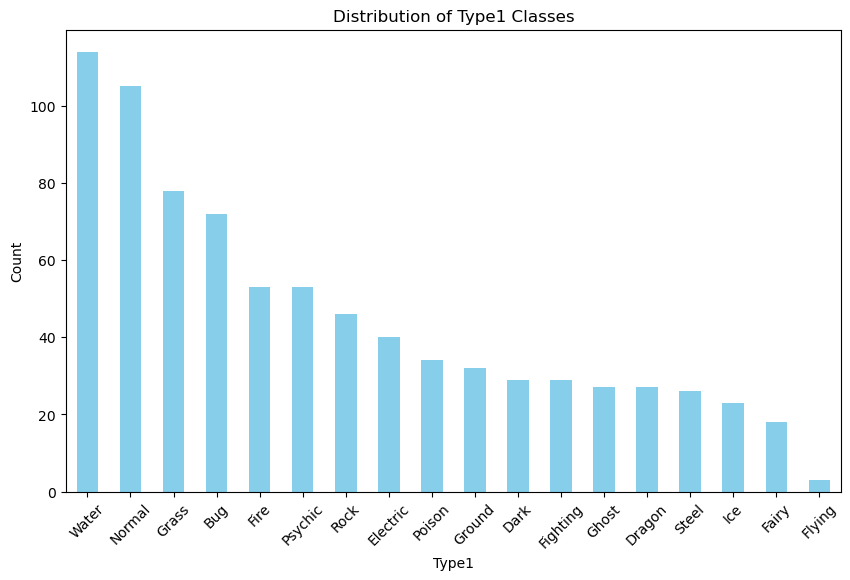

In [15]:
# Drop rows with missing Type1 (target variable)
pokemon_clean = pokemon_data.dropna(subset=['Type1'])

# Fill missing values for 'Type2' and 'Evolution'
pokemon_clean['Type2'] = pokemon_clean['Type2'].fillna('None')
pokemon_clean['Evolution'] = pokemon_clean['Evolution'].fillna('None')

# Visualize the distribution of 'Type1'
plt.figure(figsize=(10, 6))
pokemon_clean['Type1'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Type1 Classes')
plt.xlabel('Type1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Encode 'Type1' (target) into numerical labels
label_encoder = LabelEncoder()
pokemon_clean['Type1_encoded'] = label_encoder.fit_transform(pokemon_clean['Type1'])

# One-Hot Encode 'Type2'
type2_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
type2_encoded = type2_encoder.fit_transform(pokemon_clean[['Type2']])


## Step 2: Model Training
This step focuses on building and training the neural network model:
- The input features (`Type2` encoded) and target labels (`Type1` encoded) are split into training and testing datasets.
- The target labels are converted into one-hot encoding to match the output format of the neural network.
- A neural network is defined with the following structure:
  - **Input Layer**: Takes the one-hot encoded `Type2` as input.
  - **Hidden Layers**: Two dense layers with ReLU activation functions.
  - **Output Layer**: A softmax layer that outputs probabilities for each class in `Type1`.
- The model is compiled with the Adam optimizer and categorical cross-entropy loss function.
- The neural network is trained for 20 epochs, with validation data included to monitor overfitting.



In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Prepare input (X) and output (y)
X = type2_encoded  # Input: Encoded Type2
y = pokemon_clean['Type1_encoded']  # Target: Encoded Type1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=len(label_encoder.classes_))
y_test_encoded = to_categorical(y_test, num_classes=len(label_encoder.classes_))

# Define the neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=16, validation_data=(X_test, y_test_encoded))


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1314 - loss: 2.8113 - val_accuracy: 0.1852 - val_loss: 2.7317
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1623 - loss: 2.6407 - val_accuracy: 0.1605 - val_loss: 2.6984
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1879 - loss: 2.5805 - val_accuracy: 0.1728 - val_loss: 2.6910
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2009 - loss: 2.5224 - val_accuracy: 0.1852 - val_loss: 2.6907
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1863 - loss: 2.4840 - val_accuracy: 0.2037 - val_loss: 2.6574
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1620 - loss: 2.4840 - val_accuracy: 0.1975 - val_loss: 2.6913
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2071 - loss: 2.4130 - val_accuracy: 0.1914 - val_loss: 2.6862
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1939 - loss: 2.4351 - val_accuracy: 0.1790 - val_l

## Step 3: Model Evaluation
This step evaluates the trained model's performance on the test dataset:
- The model computes the **categorical cross-entropy loss** and **accuracy** on the test data.
- The results indicate how well the model generalizes to unseen data.
- Accuracy is the proportion of correctly predicted samples, while the loss measures the difference between true and predicted distributions.


In [17]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1673 - loss: 2.9670
Test Loss: 2.8918, Test Accuracy: 0.1667


## Step 4: Results Analysis
In this step, the model's performance over the training process is analyzed using visualizations:
- **Accuracy Plot**: Shows training and validation accuracy over epochs to determine if the model is improving and generalizing well.
- **Loss Plot**: Displays training and validation loss over epochs to identify signs of underfitting or overfitting.
- These plots help diagnose issues with the model, such as overfitting (divergence between training and validation accuracy).


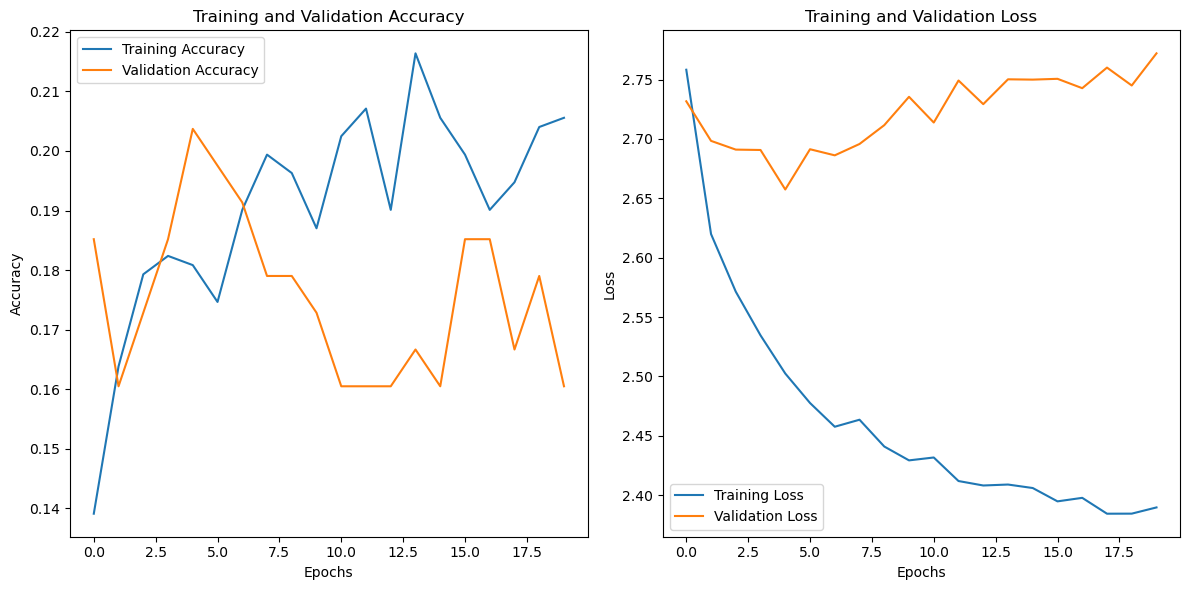

In [20]:
# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


The results indicate poor model performance, with a test accuracy of only 16.67% and a test loss of 2.89, which is close to random chance for a multi-class classification problem. 

The training loss steadily decreases, showing that the model is learning from the training data, but the validation accuracy fluctuates and the validation loss increases, suggesting overfitting and poor generalization to unseen data. This can be attributed to insufficient input features, as the model only uses the one-hot encoded Type2 column, which may not carry enough predictive information to classify Type1. Additionally, class imbalance in the dataset could make it harder for the model to learn patterns for underrepresented classes.